In [1]:
import os
# numerical computing package
import numpy as np
# 
from scipy import stats
# command style functions that make matplotlib work like MATLAB
import matplotlib.pyplot as plt
# matplotlib
import matplotlib
# find nearest value
def find_nearest_index(array, value):
    return (np.abs(array - value)).argmin()
#
import sys
#
import pickle
#
import xarray as xr
#
from glob import glob as gb
#
import time
#
import cartopy.crs as ccrs
# basemap toolkit to plot maps
from mpl_toolkits.basemap import Basemap

In [2]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [3]:
!pwd

/home/561/erd561/wombat_jra-iaf_mom025


In [4]:
figures_path = '/home/561/erd561/figures/JRA_IAF_v13/'
script_name = nb_name[:-6]
print('Figures will be saved in: ' + figures_path + script_name + '\n')

jra55_path = '/g/data/ua8/JRA55-do/v1-3/'

accessom2_path = '/g/data3/hh5/tmp/cosima/access-om2-025/025deg_jra55v13_iaf/'

Figures will be saved in: /home/561/erd561/figures/JRA_IAF_v13/c04_eta_sst_JRA-IAF



In [5]:
%%time

from dask.distributed import Client
c = Client()
print(c)

<Client: scheduler='tcp://127.0.0.1:43466' processes=8 cores=8>
CPU times: user 890 ms, sys: 155 ms, total: 1.04 s
Wall time: 4.82 s


In [6]:
years = np.arange(2218, 2258)
years_id = np.arange(2218, 2258, 2)
n_years = np.arange(1978, 2018)

print(years)
print(len(years))

output_n = ["%03d" % i for i in range(130,150)]
print(output_n)
print(len(output_n))

[2218 2219 2220 2221 2222 2223 2224 2225 2226 2227 2228 2229 2230 2231
 2232 2233 2234 2235 2236 2237 2238 2239 2240 2241 2242 2243 2244 2245
 2246 2247 2248 2249 2250 2251 2252 2253 2254 2255 2256 2257]
40
['130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149']
20


In [7]:
%%time

eta_t_dir = 'ocean/ocean_month.nc'
eta_t_path = []
for oid, o in enumerate(output_n):
    for t in np.arange(2):
        print(str(years_id[oid]+t) + ' OK')
        path_now = accessom2_path + 'output' + o + '/' + eta_t_dir

        if o == output_n[0] and t == 0:
            eta_t = xr.open_dataset(path_now).\
            eta_t.\
            sel(yt_ocean=slice(-70,0)).\
            sel(time= slice(str(years_id[oid]+t) + '-01-14', str(years_id[oid]+t) + '-12-14')).\
            mean(dim='time')
            
        else:
            eta_t = xr.concat([
                eta_t,
                xr.open_dataset(path_now).\
                eta_t.\
                sel(yt_ocean=slice(-70,0)).\
                sel(time= slice(str(years_id[oid]+t) + '-01-14', str(years_id[oid]+t) + '-12-14')).\
                mean(dim='time')
                ], 'time'
                )
eta_t = eta_t.assign_coords(time=years)
print(eta_t)


temp_dir = 'ocean/ocean.nc'
temp_path = []
for oid, o in enumerate(output_n):
    for t in np.arange(2):
        print(str(years_id[oid]+t) + ' OK')
        path_now = accessom2_path + 'output' + o + '/' + temp_dir

        if o == output_n[0] and t == 0:
            temp = xr.open_dataset(path_now).\
            temp.\
            sel(st_ocean=0, method='nearest').\
            sel(yt_ocean=slice(-70,0)).\
            sel(time= str(years_id[oid]+t) + '-06-30')-273.15
        else:
            temp = xr.concat([
                temp,
                xr.open_dataset(path_now).\
                temp.\
                sel(st_ocean=0, method='nearest').\
                sel(yt_ocean=slice(-70,0)).\
                sel(time= str(years_id[oid]) + '-06-30')-273.15
                ], 'time'
                )
temp = temp.assign_coords(time=years)
print(temp)

2218 OK
2219 OK
2220 OK
2221 OK
2222 OK
2223 OK
2224 OK
2225 OK
2226 OK
2227 OK
2228 OK
2229 OK
2230 OK
2231 OK
2232 OK
2233 OK
2234 OK
2235 OK
2236 OK
2237 OK
2238 OK
2239 OK
2240 OK
2241 OK
2242 OK
2243 OK
2244 OK
2245 OK
2246 OK
2247 OK
2248 OK
2249 OK
2250 OK
2251 OK
2252 OK
2253 OK
2254 OK
2255 OK
2256 OK
2257 OK
<xarray.DataArray 'eta_t' (time: 40, yt_ocean: 393, xt_ocean: 1440)>
array([[[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [0.389556, 0.39008 , ..., 0.388792, 0.389275],
        [0.389494, 0.389822, ..., 0.388686, 0.388947]],

       [[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [0.39909 , 0.399687, ..., 0.398058, 0.398679],
        [0.399379, 0.399877, ..., 0.398213, 0.398704]],

       ...,

       [[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
     

In [159]:
ty_trans_int_z_dir = 'ocean/ocean_month.nc'
ty_trans_int_z_path = []
for oid, o in enumerate(output_n):
    for t in np.arange(2):
        print(str(years_id[oid]+t) + ' OK')
        path_now = accessom2_path + 'output' + o + '/' + eta_t_dir

        if o == output_n[0] and t == 0:
            ty_trans_int_z = xr.open_dataset(path_now).\
            ty_trans_int_z.\
            sel(yu_ocean=slice(-70,0)).\
            sel(time= slice(str(years_id[oid]+t) + '-01-14', str(years_id[oid]+t) + '-12-14')).\
            mean(dim='time')
            
        else:
            ty_trans_int_z = xr.concat([
                ty_trans_int_z,
                xr.open_dataset(path_now).\
                ty_trans_int_z.\
                sel(yu_ocean=slice(-70,0)).\
                sel(time= slice(str(years_id[oid]+t) + '-01-14', str(years_id[oid]+t) + '-12-14')).\
                mean(dim='time')
                ], 'time'
                )
ty_trans_int_z = ty_trans_int_z.assign_coords(time=years)
print(ty_trans_int_z)

2218 OK
2219 OK
2220 OK
2221 OK
2222 OK
2223 OK
2224 OK
2225 OK
2226 OK
2227 OK
2228 OK
2229 OK
2230 OK
2231 OK
2232 OK
2233 OK
2234 OK
2235 OK
2236 OK
2237 OK
2238 OK
2239 OK
2240 OK
2241 OK
2242 OK
2243 OK
2244 OK
2245 OK
2246 OK
2247 OK
2248 OK
2249 OK
2250 OK
2251 OK
2252 OK
2253 OK
2254 OK
2255 OK
2256 OK
2257 OK
<xarray.DataArray 'ty_trans_int_z' (time: 40, yu_ocean: 393, xt_ocean: 1440)>
array([[[          nan,           nan, ...,           nan,           nan],
        [          nan,           nan, ...,           nan,           nan],
        ...,
        [ 6.593023e+07,  7.570362e+07, ...,  4.391157e+07,  5.401618e+07],
        [ 9.900653e+07,  9.089806e+07, ...,  9.326396e+07,  1.028398e+08]],

       [[          nan,           nan, ...,           nan,           nan],
        [          nan,           nan, ...,           nan,           nan],
        ...,
        [-1.853752e+08, -1.714728e+08, ..., -1.943232e+08, -1.897366e+08],
        [-2.181711e+08, -2.093151e+08, ..., -2.07

CPU times: user 948 ms, sys: 238 ms, total: 1.19 s
Wall time: 1.1 s


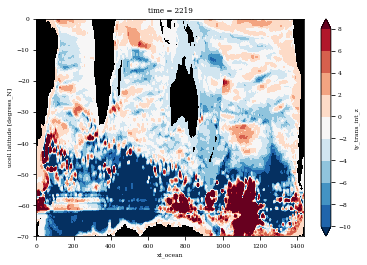

In [226]:
%%time

roll = 580

xt_ocean = eta_t.xt_ocean
xt_ocean_roll = xt_ocean.roll(xt_ocean=roll)
xt_ocean_for_plot = np.arange(len(xt_ocean))
xt_ocean_plot = xr.DataArray(xt_ocean_for_plot, dims=
    'xt_ocean', coords=[xt_ocean_for_plot], name='xt_ocean')
xt_ocean_plot_label = np.linspace(xt_ocean_roll[0], xt_ocean_roll[0]+360, 1440)
xt_ocean_plot_label[np.where(xt_ocean_plot_label > 180)] -= 360

eta_t_plot = eta_t.roll(xt_ocean=roll)
eta_t_plot = eta_t_plot.assign_coords(xt_ocean=xt_ocean_plot)
eta_t_plot_anom = eta_t_plot - eta_t_plot.mean(dim='time')

temp_plot = temp.roll(xt_ocean=roll)
temp_plot = temp_plot.assign_coords(xt_ocean=xt_ocean_plot)
temp_plot_anom = temp_plot - temp_plot.mean(dim='time')

ty_trans_int_z_plot = ty_trans_int_z.roll(xt_ocean=roll)/1000000000
ty_trans_int_z_plot = ty_trans_int_z_plot.assign_coords(xt_ocean=xt_ocean_plot)
ty_trans_int_z_plot_anom = ty_trans_int_z_plot - ty_trans_int_z_plot.mean(dim='time')

ty_trans_int_z_cint_x_plot = ty_trans_int_z_plot_anom.cumsum(dim='xt_ocean')

ty_trans_int_z_cint_x_plot2 = ty_trans_int_z_cint_x_plot.where(np.isfinite(ty_trans_int_z_plot), np.nan)

ty_trans_int_z_cint_x_plot2[1].plot.contourf(levels=np.arange(-10,10,2))
plt.gca().set_facecolor('black')

year 0
year 1
year 2
year 3
year 4
year 5
year 6
year 7
year 8
year 9
year 10
year 11
year 12
year 13
year 14
year 15
year 16
year 17
year 18
year 19
year 20
year 21
year 22
year 23
year 24
year 25
year 26
year 27
year 28
year 29
year 30
year 31
year 32
year 33
year 34
year 35
year 36
year 37
year 38
year 39
CPU times: user 36.5 s, sys: 20 s, total: 56.5 s
Wall time: 31.9 s


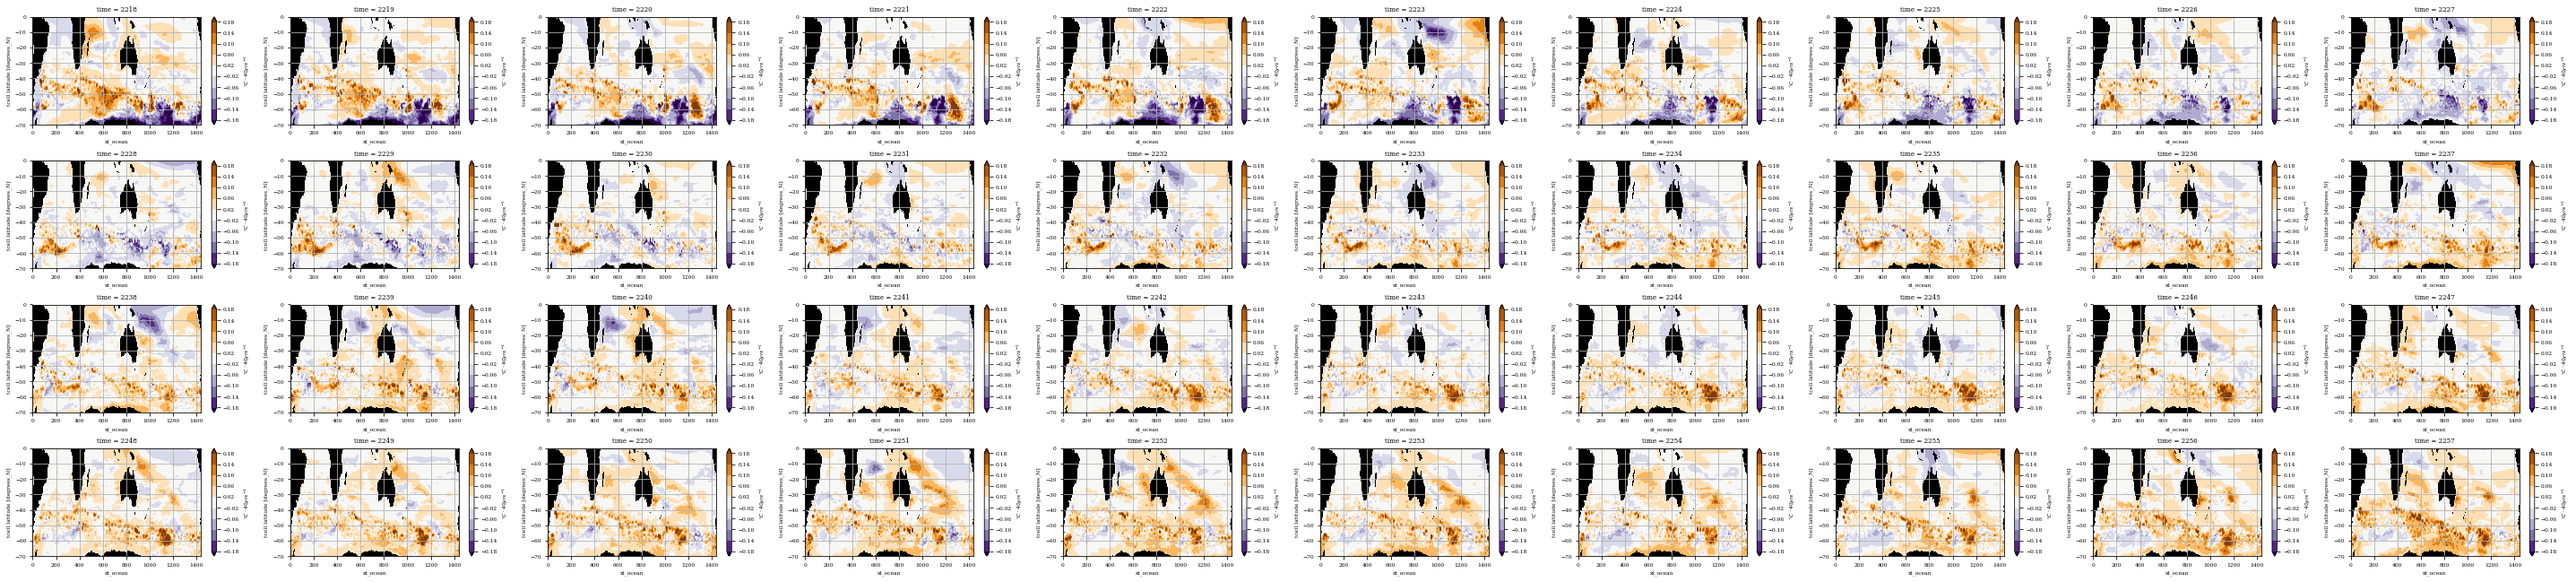

In [143]:
%%time

matplotlib.rcParams.update({'font.size': 6}) 
row = 4
col = 10
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.close('all')
fig = plt.figure() 
fig.set_size_inches(40,10)

for s in np.arange(row*col):
    ax = plt.subplot(row,col,s+1)
    cmap = 'PuOr_r'
    step = 0.04
    contf_lvls = np.arange(-0.18,0.18+1e-08,step) 
    eta_t_plot_anom[s].plot.contourf(levels=contf_lvls, cmap=cmap, extend='both', 
                             cbar_kwargs={'label': '$^{\circ}C \cdot ' + str(yr_sel) + ' yrs^{-1}$'})
    plt.grid()
    plt.gca().set_facecolor('black')
    print('year ' + str(s))


# plt.plot(
#     [lon_LC[0]-360, lon_LC[1]-360, lon_LC[1]-360, lon_LC[0]-360, lon_LC[0]-360],
#     [lat_LC[0], lat_LC[0], lat_LC[1], lat_LC[1], lat_LC[0]])
# plt.plot(
#     [lon_GAB[0]-360, lon_GAB[1]-360, lon_GAB[1]-360, lon_GAB[0]-360, lon_GAB[0]-360],
#     [lat_GAB[0], lat_GAB[0], lat_GAB[1], lat_GAB[1], lat_GAB[0]])
# plt.plot(
#     [lon_TS[0]-360, lon_TS[1]-360, lon_TS[1]-360, lon_TS[0]-360, lon_TS[0]-360],
#     [lat_TS[0], lat_TS[0], lat_TS[1], lat_TS[1], lat_TS[0]])
# plt.title('SST linear trend from 1978 to 2017')


fig.tight_layout(rect=[0, 0, 1, 0.90])

output_ls = os.listdir(figures_path)
if not script_name:
    script_name = 'test'
elif script_name not in output_ls:
    os.mkdir(figures_path + '/' + script_name)
plt.savefig(figures_path + '/' + script_name + '/' + script_name[0:3] \
            + '_fig1_.png', bbox_inches='tight', dpi=200)

year 0
year 1
year 2
year 3
year 4
year 5
year 6
year 7
year 8
year 9
year 10
year 11
year 12
year 13
year 14
year 15
year 16
year 17
year 18
year 19
year 20
year 21
year 22
year 23
year 24
year 25
year 26
year 27
year 28
year 29
year 30
year 31
year 32
year 33
year 34
year 35
year 36
year 37
year 38
year 39
CPU times: user 37.7 s, sys: 20.2 s, total: 57.9 s
Wall time: 32.9 s


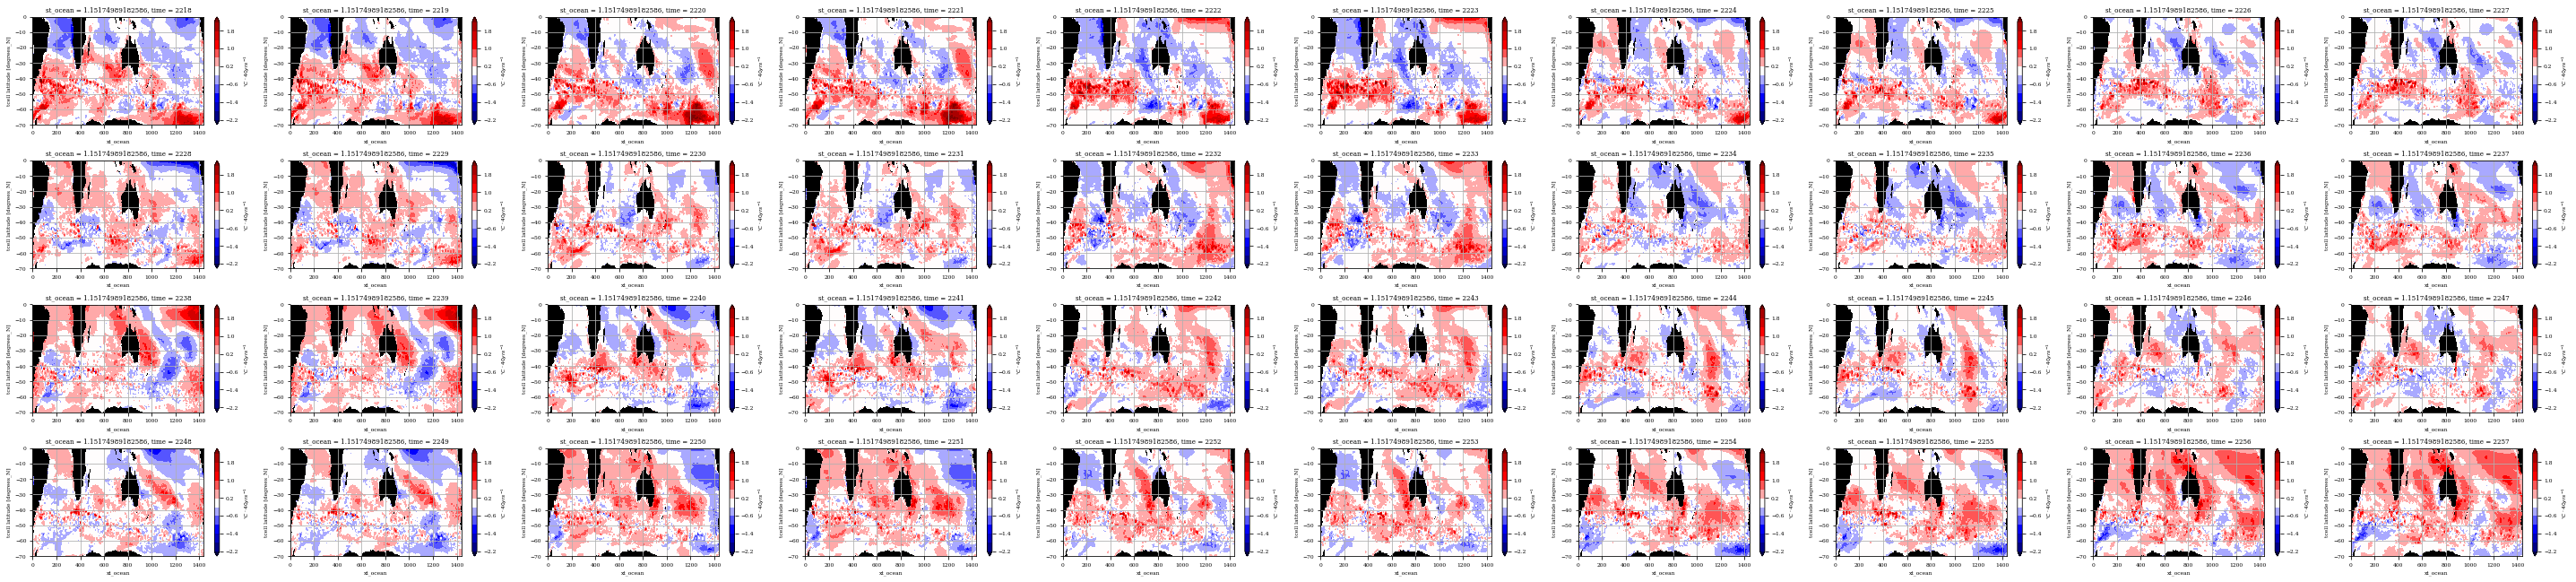

In [138]:
%%time

matplotlib.rcParams.update({'font.size': 6}) 
row = 4
col = 10
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.close('all')
fig = plt.figure() 
fig.set_size_inches(40,10)

for s in np.arange(row*col):
    ax = plt.subplot(row,col,s+1)
    cmap = 'seismic'
    step = 0.4
    contf_lvls = np.arange(-2.2,2.2+1e-08,step) 
    h = temp_plot_anom[s].plot.contourf(levels=contf_lvls, cmap=cmap, extend='both', 
                             cbar_kwargs={'label': '$^{\circ}C \cdot ' + str(yr_sel) + ' yrs^{-1}$'})
    plt.grid()
    plt.gca().set_facecolor('black')
    print('year ' + str(s))


# plt.plot(
#     [lon_LC[0]-360, lon_LC[1]-360, lon_LC[1]-360, lon_LC[0]-360, lon_LC[0]-360],
#     [lat_LC[0], lat_LC[0], lat_LC[1], lat_LC[1], lat_LC[0]])
# plt.plot(
#     [lon_GAB[0]-360, lon_GAB[1]-360, lon_GAB[1]-360, lon_GAB[0]-360, lon_GAB[0]-360],
#     [lat_GAB[0], lat_GAB[0], lat_GAB[1], lat_GAB[1], lat_GAB[0]])
# plt.plot(
#     [lon_TS[0]-360, lon_TS[1]-360, lon_TS[1]-360, lon_TS[0]-360, lon_TS[0]-360],
#     [lat_TS[0], lat_TS[0], lat_TS[1], lat_TS[1], lat_TS[0]])
# plt.title('SST linear trend from 1978 to 2017')


fig.tight_layout(rect=[0, 0, 1, 0.90])

output_ls = os.listdir(figures_path)
if not script_name:
    script_name = 'test'
elif script_name not in output_ls:
    os.mkdir(figures_path + '/' + script_name)
plt.savefig(figures_path + '/' + script_name + '/' + script_name[0:3] \
            + '_fig2_.png', bbox_inches='tight', dpi=200)

In [ ]:
# this calculates the trend: takes ages !!
%%time

yr_sel = 40

yt_ocean = eta_t.yt_ocean
print(yt_ocean)

eta_t_slopes = xr.DataArray(np.zeros([yt_ocean.shape[0], xt_ocean.shape[0]]), dims=(
    'yt_ocean', 'xt_ocean'), coords=[yt_ocean, xt_ocean_plot], name='eta_t')
print(eta_t_slopes)

print(eta_t)
for iid, i in enumerate(yt_ocean):
    for jid, j in enumerate(xt_ocean):
        eta_t_slopes[iid, jid], _, _, _, _ = \
        stats.linregress(years[-yr_sel:], eta_t[-yr_sel:].sel(xt_ocean=j, yt_ocean=i))
    print('lat ' + str(np.array(i)))
print(eta_t_slopes)  

CPU times: user 5.58 s, sys: 3.4 s, total: 8.98 s
Wall time: 4.84 s


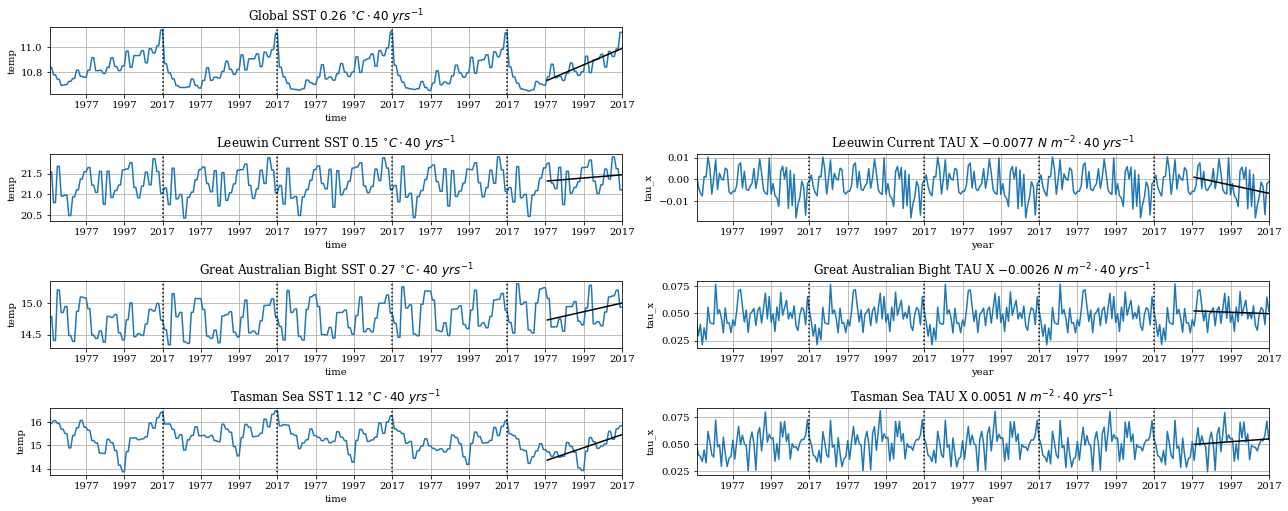

In [11]:
%%time

yr_sel = 40

matplotlib.rcParams.update({'font.size': 10}) 
row = 4
col = 2
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.close('all')
fig = plt.figure() 
fig.set_size_inches(18,8)


##
ax = plt.subplot(row,col,1)
sst_global.plot()
plt.title('Global SST')
plt.xticks(years[np.arange(19,300,20)], n_years_all[np.arange(19,300,20)])
ax.grid()
plt.xlim(1958,2257)
slope, intercept, r_value, p_value, std_err = stats.linregress(years[-yr_sel:], sst_global[-yr_sel:])
plt.plot([years[-yr_sel], years[-1]], [years[-yr_sel]*slope+intercept, years[-1]*slope+intercept], color='black')
plt.title('Global SST ' + '$' + str(np.round(slope*yr_sel,2)) + '\ ^{\circ}C \cdot '
          + str(yr_sel) + '\ yrs^{-1}$')
plt.plot(
    [years[59], years[59]], [-1, 30], 
    [years[119], years[119]], [-1, 30], 
    [years[179], years[179]], [-1, 30], 
    [years[239], years[239]], [-1, 30], 
    color='k', linestyle=':')

# ##
ax = plt.subplot(row,col,3)
sst_LC.plot()
plt.xticks(years[np.arange(19,300,20)], n_years_all[np.arange(19,300,20)])
ax.grid()
plt.xlim(1958,2257)
slope, intercept, r_value, p_value, std_err = stats.linregress(years[-yr_sel:], sst_LC[-yr_sel:])
plt.plot([years[-yr_sel], years[-1]], [years[-yr_sel]*slope+intercept, years[-1]*slope+intercept], color='black')
plt.title('Leeuwin Current SST ' + '$' + str(np.round(slope*yr_sel,2)) + '\ ^{\circ}C \cdot '
          + str(yr_sel) + '\ yrs^{-1}$')
plt.plot(
    [years[59], years[59]], [-1, 30], 
    [years[119], years[119]], [-1, 30], 
    [years[179], years[179]], [-1, 30], 
    [years[239], years[239]], [-1, 30], 
    color='k', linestyle=':')
ax = plt.subplot(row,col,4)
taux_LC.plot()
plt.xticks(years[np.arange(19,300,20)], n_years_all[np.arange(19,300,20)])
ax.grid()
plt.xlim(1958,2257)
slope, intercept, r_value, p_value, std_err = stats.linregress(years[-yr_sel:], taux_LC[-yr_sel:])
plt.plot([years[-yr_sel], years[-1]], [years[-yr_sel]*slope+intercept, years[-1]*slope+intercept], color='black')
plt.title('Leeuwin Current TAU X ' + '$' + str(np.round(slope*yr_sel,4)) + '\ N\ m^{-2} \cdot '
          + str(yr_sel) + '\ yrs^{-1}$')
plt.plot(
    [years[59], years[59]], [-1, 30], 
    [years[119], years[119]], [-1, 30], 
    [years[179], years[179]], [-1, 30], 
    [years[239], years[239]], [-1, 30], 
    color='k', linestyle=':')

# ##
ax = plt.subplot(row,col,5)
sst_GAB.plot()
plt.xticks(years[np.arange(19,300,20)], n_years_all[np.arange(19,300,20)])
ax.grid()
plt.xlim(1958,2257)
slope, intercept, r_value, p_value, std_err = stats.linregress(years[-yr_sel:], sst_GAB[-yr_sel:])
plt.plot([years[-yr_sel], years[-1]], [years[-yr_sel]*slope+intercept, years[-1]*slope+intercept], color='black')
plt.title('Great Australian Bight SST ' + '$' + str(np.round(slope*yr_sel,2)) + '\ ^{\circ}C \cdot '
          + str(yr_sel) + '\ yrs^{-1}$')
plt.plot(
    [years[59], years[59]], [-1, 30], 
    [years[119], years[119]], [-1, 30], 
    [years[179], years[179]], [-1, 30], 
    [years[239], years[239]], [-1, 30], 
    color='k', linestyle=':')
ax = plt.subplot(row,col,6)
taux_GAB.plot()
plt.xticks(years[np.arange(19,300,20)], n_years_all[np.arange(19,300,20)])
ax.grid()
plt.xlim(1958,2257)
slope, intercept, r_value, p_value, std_err = stats.linregress(years[-yr_sel:], taux_GAB[-yr_sel:])
plt.plot([years[-yr_sel], years[-1]], [years[-yr_sel]*slope+intercept, years[-1]*slope+intercept], color='black')
plt.title('Great Australian Bight TAU X ' + '$' + str(np.round(slope*yr_sel,4)) + '\ N\ m^{-2} \cdot '
          + str(yr_sel) + '\ yrs^{-1}$')
plt.plot(
    [years[59], years[59]], [-1, 30], 
    [years[119], years[119]], [-1, 30], 
    [years[179], years[179]], [-1, 30], 
    [years[239], years[239]], [-1, 30], 
    color='k', linestyle=':')

# ##
ax = plt.subplot(row,col,7)
sst_TS.plot()
plt.xticks(years[np.arange(19,300,20)], n_years_all[np.arange(19,300,20)])
ax.grid()
plt.xlim(1958,2257)
slope, intercept, r_value, p_value, std_err = stats.linregress(years[-yr_sel:], sst_TS[-yr_sel:])
plt.plot([years[-yr_sel], years[-1]], [years[-yr_sel]*slope+intercept, years[-1]*slope+intercept], color='black')
plt.title('Tasman Sea SST ' + '$' + str(np.round(slope*yr_sel,2)) + '\ ^{\circ}C \cdot '
          + str(yr_sel) + '\ yrs^{-1}$')
plt.plot(
    [years[59], years[59]], [-1, 30], 
    [years[119], years[119]], [-1, 30], 
    [years[179], years[179]], [-1, 30], 
    [years[239], years[239]], [-1, 30], 
    color='k', linestyle=':')
ax = plt.subplot(row,col,8)
taux_TS.plot()
plt.xticks(years[np.arange(19,300,20)], n_years_all[np.arange(19,300,20)])
ax.grid()
plt.xlim(1958,2257)
slope, intercept, r_value, p_value, std_err = stats.linregress(years[-yr_sel:], taux_TS[-yr_sel:])
plt.plot([years[-yr_sel], years[-1]], [years[-yr_sel]*slope+intercept, years[-1]*slope+intercept], color='black')
plt.title('Tasman Sea TAU X ' + '$' + str(np.round(slope*yr_sel,4)) + '\ N\ m^{-2} \cdot '
          + str(yr_sel) + '\ yrs^{-1}$')
plt.plot(
    [years[59], years[59]], [-1, 30], 
    [years[119], years[119]], [-1, 30], 
    [years[179], years[179]], [-1, 30], 
    [years[239], years[239]], [-1, 30], 
    color='k', linestyle=':')

fig.tight_layout(rect=[0, 0, 1, 0.90])

output_ls = os.listdir(figures_path)
if not script_name:
    script_name = 'test'
elif script_name not in output_ls:
    os.mkdir(figures_path + '/' + script_name)
plt.savefig(figures_path + '/' + script_name + '/' + script_name[0:3] \
            + '_fig6_.png', bbox_inches='tight', dpi=200)



CPU times: user 3.6 s, sys: 1.62 s, total: 5.22 s
Wall time: 3.55 s


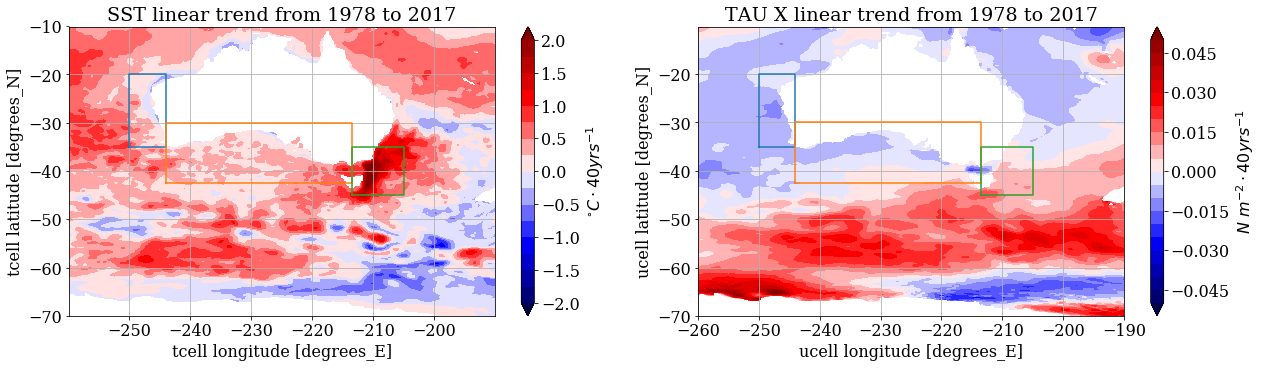

In [75]:
%%time

matplotlib.rcParams.update({'font.size': 16}) 
row = 1
col = 2
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.close('all')
fig = plt.figure() 
fig.set_size_inches(18,6)

ax = plt.subplot(row,col,1)
cmap = 'seismic'
step = 0.25
contf_lvls = np.arange(-2,2+1e-08,step) 
sst_slopes_yrsel = sst_slopes*yr_sel
sst_slopes_yrsel.plot.contourf(levels=contf_lvls, cmap=cmap, extend='both', 
                         cbar_kwargs={'label': '$^{\circ}C \cdot ' + str(yr_sel) + ' yrs^{-1}$'})
plt.grid()
plt.plot(
    [lon_LC[0]-360, lon_LC[1]-360, lon_LC[1]-360, lon_LC[0]-360, lon_LC[0]-360],
    [lat_LC[0], lat_LC[0], lat_LC[1], lat_LC[1], lat_LC[0]])
plt.plot(
    [lon_GAB[0]-360, lon_GAB[1]-360, lon_GAB[1]-360, lon_GAB[0]-360, lon_GAB[0]-360],
    [lat_GAB[0], lat_GAB[0], lat_GAB[1], lat_GAB[1], lat_GAB[0]])
plt.plot(
    [lon_TS[0]-360, lon_TS[1]-360, lon_TS[1]-360, lon_TS[0]-360, lon_TS[0]-360],
    [lat_TS[0], lat_TS[0], lat_TS[1], lat_TS[1], lat_TS[0]])
plt.title('SST linear trend from 1978 to 2017')


ax = plt.subplot(row,col,2)
cmap = 'seismic'
step = 0.005
contf_lvls = np.arange(-0.05,0.05+1e-08,step) 
taux_slopes_yrsel = taux_slopes*yr_sel
taux_slopes_yrsel.plot.contourf(levels=contf_lvls, cmap=cmap, extend='both', 
                         cbar_kwargs={'label': '$N\ m^{-2} \cdot ' + str(yr_sel) + ' yrs^{-1}$'})
plt.grid()
plt.plot(
    [lon_LC[0]-360, lon_LC[1]-360, lon_LC[1]-360, lon_LC[0]-360, lon_LC[0]-360],
    [lat_LC[0], lat_LC[0], lat_LC[1], lat_LC[1], lat_LC[0]])
plt.plot(
    [lon_GAB[0]-360, lon_GAB[1]-360, lon_GAB[1]-360, lon_GAB[0]-360, lon_GAB[0]-360],
    [lat_GAB[0], lat_GAB[0], lat_GAB[1], lat_GAB[1], lat_GAB[0]])
plt.plot(
    [lon_TS[0]-360, lon_TS[1]-360, lon_TS[1]-360, lon_TS[0]-360, lon_TS[0]-360],
    [lat_TS[0], lat_TS[0], lat_TS[1], lat_TS[1], lat_TS[0]])
plt.title('TAU X linear trend from 1978 to 2017')


# ##
# ax = plt.subplot(row,col,2)
# cmap = 'seismic'
# step = 0.0001
# contf_lvls = np.arange(-0.0010,0.0010+1e-08,step) 
# # draw land outlines
# Bm.drawcoastlines(linewidth=1.5)
# contf = Bm.contourf(Bm_lons, Bm_lats, taux_slopes, 
#                    contf_lvls, cmap=cmap, extend='both')
# # meridians. last input is meridians tick label
# Bm.drawmeridians(np.arange(110, 180, 20), linewidth=0.2, labels=[0,0,0,1])
# # parallels. last input is paralles tick label
# Bm.drawparallels(np.arange(-70, -10, 10), linewidth=0.2, labels=[1,0,0,0])
# plt.title('MOM025 under JRA-55-do TAU X trend from 1978 to 2016')
# cbar = plt.colorbar()
# cbar.set_label('$m^{2}\ s^{-1} \cdot yr^{-1}$')


# ax = plt.subplot(row,col,2, projection=ccrs.PlateCarree())
# ax.coastlines()
# cmap = 'seismic'
# step = 0.005
# contf_lvls = np.arange(-0.04,0.04+1e-08,step)
# uas_10m_slopes.plot.contourf(levels=contf_lvls, cmap=cmap, extend='both')
# # plt.title('Surface zonal wind speed ' + str(years[fid]))
# ax.set_xticks(np.arange(100,170,10), crs=ccrs.PlateCarree())
# ax.set_yticks(np.arange(-70,-10,10), crs=ccrs.PlateCarree())
# ax.grid()

fig.tight_layout(rect=[0, 0, 1, 0.90])

output_ls = os.listdir(figures_path)
if not script_name:
    script_name = 'test'
elif script_name not in output_ls:
    os.mkdir(figures_path + '/' + script_name)
plt.savefig(figures_path + '/' + script_name + '/' + script_name[0:3] \
            + '_fig7_.png', bbox_inches='tight', dpi=200)

In [ ]:
fig = plt.figure()
fig.set_size_inches(18,8)
eta_t_plot[0].plot.contourf(levels=np.arange(-1.0,1.100001,0.1),cmap=plt.cm.seismic)
plt.xticks(xt_ocean_plot[np.arange(0,1440,100)], np.round(xt_ocean_plot_label[np.arange(0,1440,100)], 2))

In [ ]:
# %%time

# output_n = ["%03d" % i for i in range(150)]
# sst_dir = 'ice/OUTPUT/iceh.'
# sst_path = []

# for oid, o in enumerate(output_n):
#     for t in np.arange(2):
#         print(str(years_id[oid]+t) + ' OK')
#         sst_path_all = sorted(gb(accessom2_path + 'output' + o + '/' 
#                   + sst_dir + str(years_id[oid]+t) + '-*.nc'))

#         for p in sst_path_all:
#             if p == sst_path_all[0]:
#                 sst_now = xr.open_dataset(p).\
#                     sst_m
#             else:
#                 sst_now = xr.concat([
#                 sst_now,
#                 xr.open_dataset(p).\
#                 sst_m
#                 ], 'time'
#                 )

#         if o == output_n[0] and t == 0:
#             sst = sst_now.mean(dim='time')
#         else:
#             sst = xr.concat([
#                 sst,
#                 sst_now.mean(dim='time')
#             ], 'year'
#             )
             
# print(sst)

In [ ]:
# %%time

# # tx_trans_dir = 'ocean/ocean.nc'
# # tx_trans_path = []
# # for oid, o in enumerate(output_n[0:1]):
# #     for t in np.arange(2):
# #         print(str(years_id[oid]+t) + ' OK')
# #         path_now = accessom2_path + 'output' + o + '/' + tx_trans_dir

# #         if o == output_n[0] and t == 0:
# #             tx_trans_now = xr.open_dataset(path_now).\
# #             tx_trans.\
# #             sel(time= str(years_id[oid]+t) + '-06-30').\
# #             sel(yt_ocean=slice(-80,0))
            
# #             tx_trans_masked = tx_trans_now.where(tx_trans_now == 0.)
            
# #             tx_trans = tx_trans_masked.\
# #             where(tx_trans_now == 0.).\
# #             sum(dim=('st_ocean')).\
# #             cumsum(dim=('yt_ocean'))/1000000000
# #         else:
# #             tx_trans = xr.concat([
# #                 tx_trans,
# #                 xr.open_dataset(path_now).\
# #                 tx_trans.\
# #                 sel(time= str(years_id[oid]+t) + '-06-30').\
# #                 sel(yt_ocean=slice(-80,0)).\
# #                 sum(dim=('st_ocean')).\
# #                 cumsum(dim=('yt_ocean'))/1000000000
# #                 ], 'time'
# #                 )
# # # tx_trans = sst.assign_coords(time=years)
# # print(tx_trans)
# # print(tx_trans_masked)

# ty_trans_dir = 'ocean/ocean.nc'
# ty_trans_path = []
# for oid, o in enumerate(output_n[0:1]):
#     for t in np.arange(2):
#         print(str(years_id[oid]+t) + ' OK')
#         path_now = accessom2_path + 'output' + o + '/' + ty_trans_dir

#         if o == output_n[0] and t == 0:
#             ty_trans_mask = xr.open_dataset(path_now).\
#             ty_trans.\
#             sel(time= str(years_id[oid]+t) + '-06-30').\
#             sel(yu_ocean=slice(-52,0)).\
#             sum(dim=('st_ocean'))
            
#             ty_trans_unmasked = ty_trans_mask.\
#             cumsum(dim=('xt_ocean'))/1000000000
            
#             ty_trans = ty_trans_unmasked.where(ty_trans_mask != 0.)
            
# #         else:
# #             ty_trans = xr.concat([
# #                 ty_trans,
# #                 xr.open_dataset(path_now).\
# #                 ty_trans.\
# #                 sel(time= str(years_id[oid]+t) + '-06-30').\
# #                 sel(yu_ocean=slice(-52,0)).\
# #                 sum(dim=('st_ocean')).\
# #                 cumsum(dim=('xt_ocean'))/1000000000
# #                 ], 'time'
# #                 )
# # tx_trans = sst.assign_coords(time=years)
# print(ty_trans)


# # sst_global = \
# #     sst.\
# #     mean(dim=('yt_ocean', 'xt_ocean'))

# # lon_GAB = [116, 146.5]
# # lat_GAB = [-42.5, -30]
# # sst_GAB = \
# #     sst.\
# #     sel(yt_ocean=slice(lat_GAB[0],lat_GAB[1]), 
# #         xt_ocean=slice(lon_GAB[0]-360,lon_GAB[1]-360)).\
# #     mean(dim=('yt_ocean', 'xt_ocean'))
            
# # lon_TS = [146.5, 155]
# # lat_TS = [-45, -35]
# # sst_TS = \
# #     sst.\
# #     sel(yt_ocean=slice(lat_TS[0],lat_TS[1]), 
# #         xt_ocean=slice(lon_TS[0]-360,lon_TS[1]-360)).\
# #     mean(dim=('yt_ocean', 'xt_ocean'))

# # lon_LC = [110, 116]
# # lat_LC = [-35, -20]
# # sst_LC = \
# #     sst.\
# #     sel(yt_ocean=slice(lat_LC[0],lat_LC[1]), 
# #         xt_ocean=slice(lon_LC[0]-360,lon_LC[1]-360)).\
# #     mean(dim=('yt_ocean', 'xt_ocean'))
# # print(sst_global)